In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
df = pd.read_csv('boston_weather_data.csv')
df.describe()

,tavg,tmin,tmax,prcp,wdir,wspd,pres
count,3652.000000,3653.000000,3653.000000,3653.000000,3066.000000,3653.000000,3492.000000
mean,11.549863,7.507692,15.875691,2.936819,200.876712,17.555407,1016.520790
std,9.559483,9.386869,10.221851,7.505755,100.070063,6.009118,7.767252
min,-17.800000,-23.300000,-12.100000,0.000000,0.000000,2.500000,983.900000
25%,3.900000,0.600000,7.200000,0.000000,112.000000,13.300000,1011.400000
50%,11.500000,7.800000,15.600000,0.000000,226.500000,16.600000,1016.400000
75%,19.900000,15.600000,24.400000,1.500000,279.000000,20.900000,1021.600000
max,32.300000,28.300000,37.800000,78.000000,360.000000,61.200000,1042.400000


In [302]:
df.isnull().sum()

time      0
tavg      1
tmin      0
tmax      0
prcp      0
wdir    587
wspd      0
pres    161
dtype: int64

In [303]:
print(df.shape)
df = df.dropna()
df = df.drop('time', axis=1)
print(df.shape)

(3653, 8)
(2978, 7)


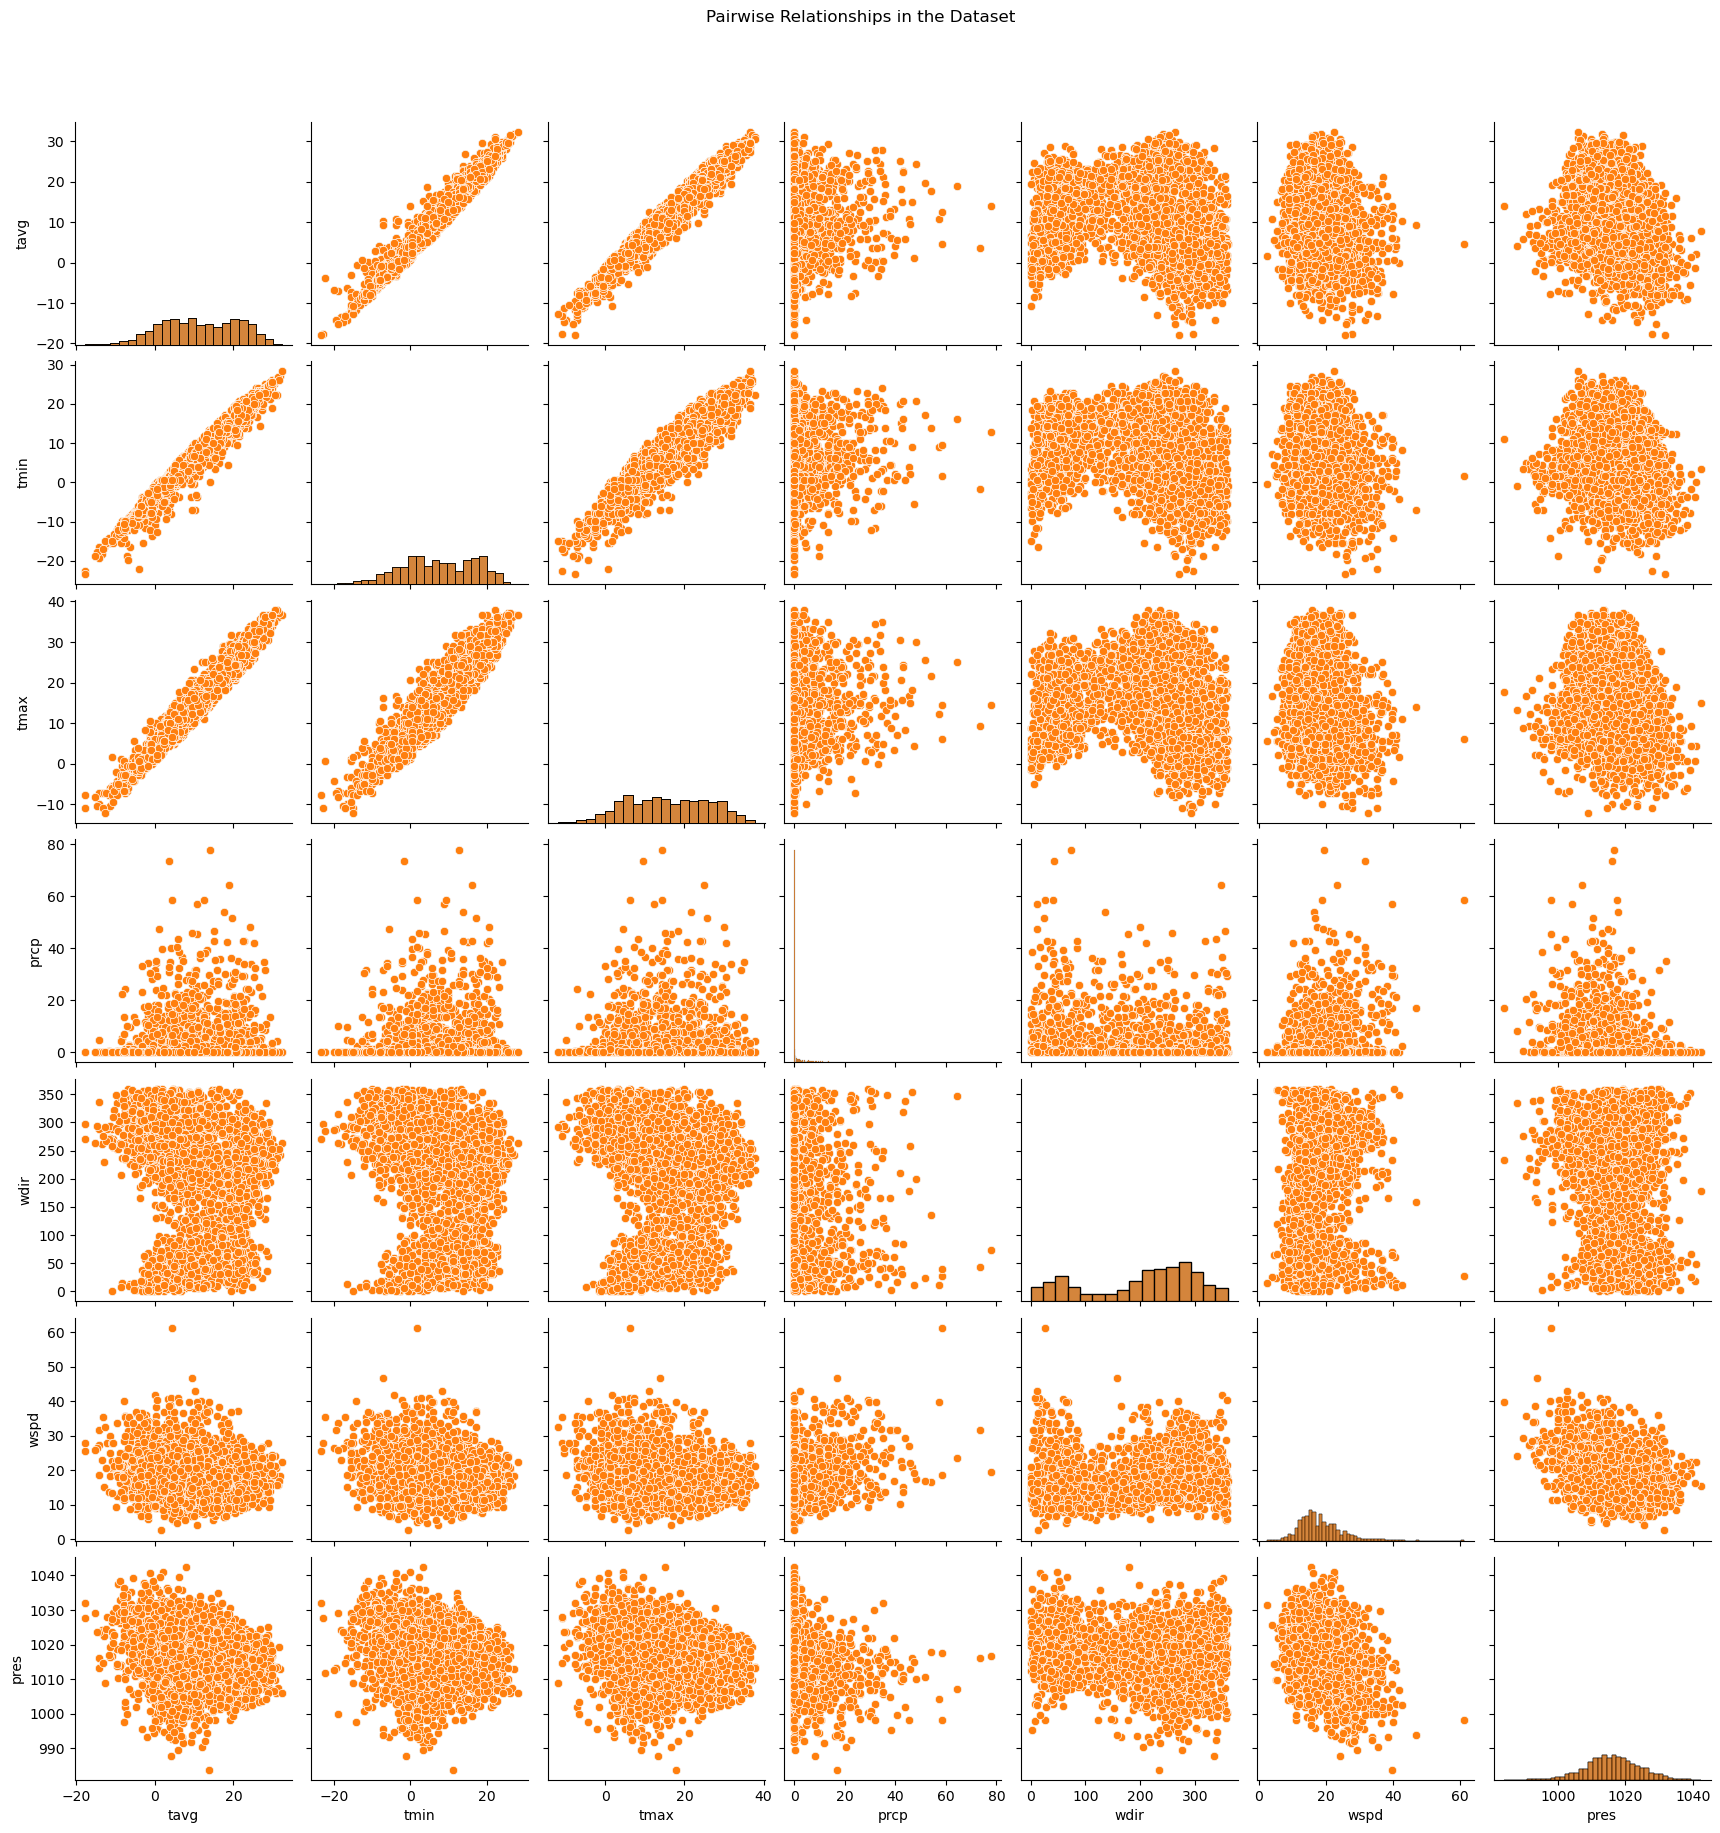

In [304]:
pairwise = sns.pairplot(df)
pairwise.map_diag(sns.histplot)
pairwise.map_offdiag(sns.scatterplot)
plt.suptitle('Pairwise Relationships in the Dataset', y=1.05)
plt.show()

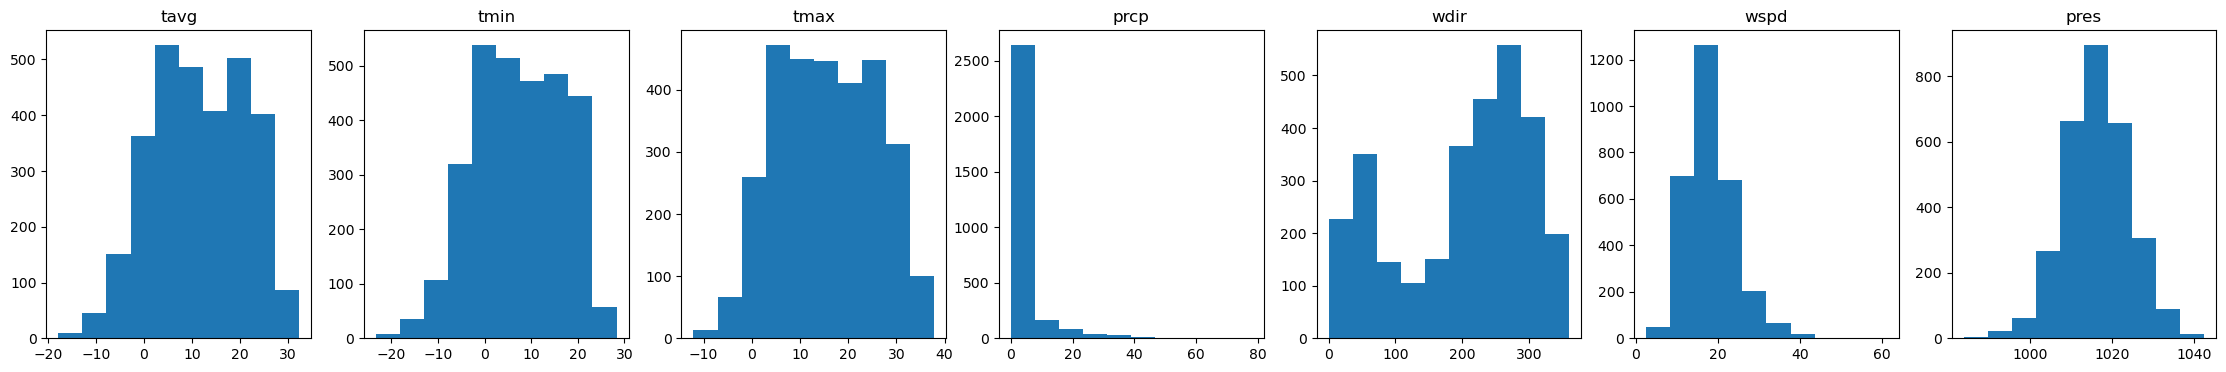

In [305]:
fig, ax = plt.subplots(1, 7, figsize =(28, 4))
for i in range(0, 7):
    ax[i].hist(df.iloc[:, i])
    ax[i].set_title(df.columns[i])
plt.show()

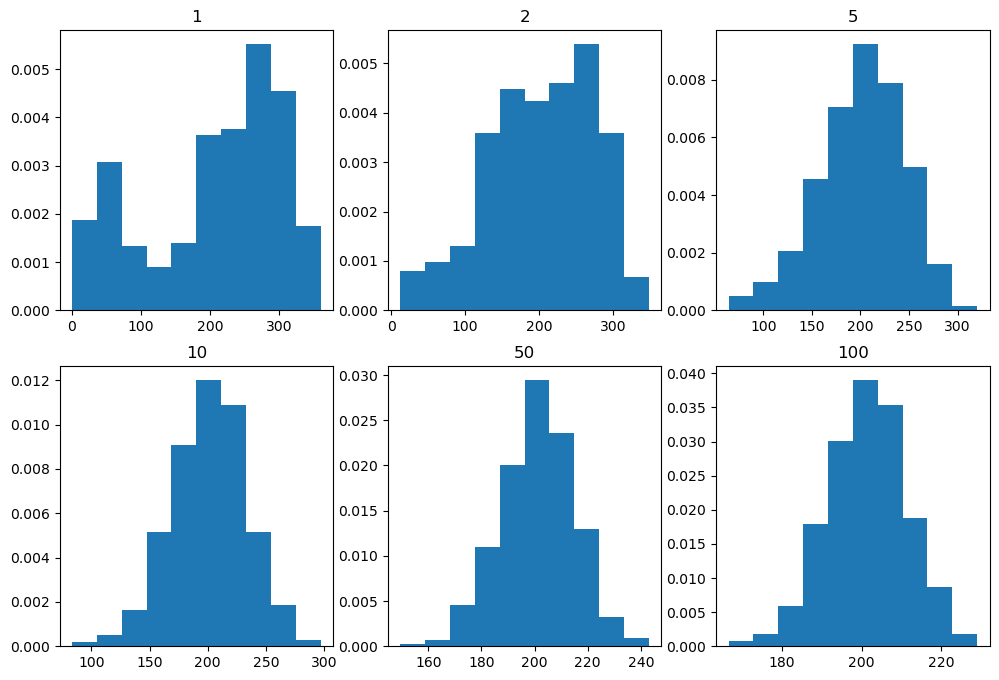

Fail to reject the null hypothesis with a test statistic of 0.08


In [306]:
# sample size
size = [1, 2, 5, 10, 50, 100]

# list of sample means
means = []  

# take 1000 means from random samples of incremented sizes
for s in size:
    # seeded random for consistency
    np.random.seed(1)
    x = [np.mean(np.random.choice(df['wdir'], size=s, replace=True)) for i in range(1000)]
    means.append(x)

k = 0 
# plotting all the means
fig, ax = plt.subplots(2, 3, figsize =(12, 8))
for i in range(0, 2):
    for j in range(0, 3):
        # histogram for each sample size
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = size[k])
        k = k + 1
plt.show()

# 95% significance level
z_score = 1.96
population_mean = df['wdir'].mean()
sample_mean = np.mean(means[len(means) - 1])
population_std = np.std(df['wdir'])
num_samples = np.size(means[len(means) - 1])
test_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(num_samples))

# compare to the test statistic to the z-score value
if np.abs(test_statistic) > z_score:
    print('Reject the null hypothesis with a test statistic of', round(test_statistic, 2))
else:
    print('Fail to reject the null hypothesis with a test statistic of', round(test_statistic, 2))

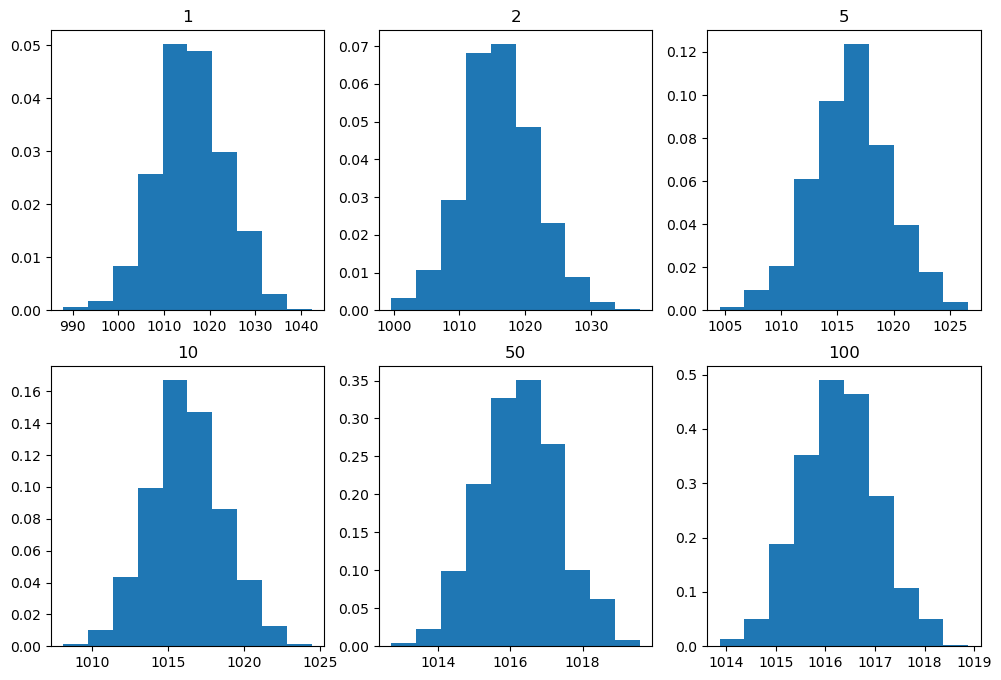

Fail to reject the null hypothesis with a test statistic of -0.01


In [307]:
# sample size
size = [1, 2, 5, 10, 50, 100]

# list of sample means
means = []  

# take 1000 means from random samples of incremented sizes
for s in size:
    # seeded random for consistency
    np.random.seed(5)
    x = [np.mean(np.random.choice(df['pres'], size=s, replace=True)) for i in range(1000)]
    means.append(x)

k = 0 
# plotting all the means
fig, ax = plt.subplots(2, 3, figsize =(12, 8))
for i in range(0, 2):
    for j in range(0, 3):
        # histogram for each sample size
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = size[k])
        k = k + 1
plt.show()

# 95% significance level
z_score = 1.96
population_mean = df['pres'].mean()
sample_mean = np.mean(means[len(means) - 1])
population_std = np.std(df['pres'])
num_samples = np.size(means[len(means) - 1])
test_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(num_samples))

# compare to the test statistic to the z-score value
if np.abs(test_statistic) > z_score:
    print('Reject the null hypothesis with a test statistic of', round(test_statistic, 2))
else:
    print('Fail to reject the null hypothesis with a test statistic of', round(test_statistic, 2))

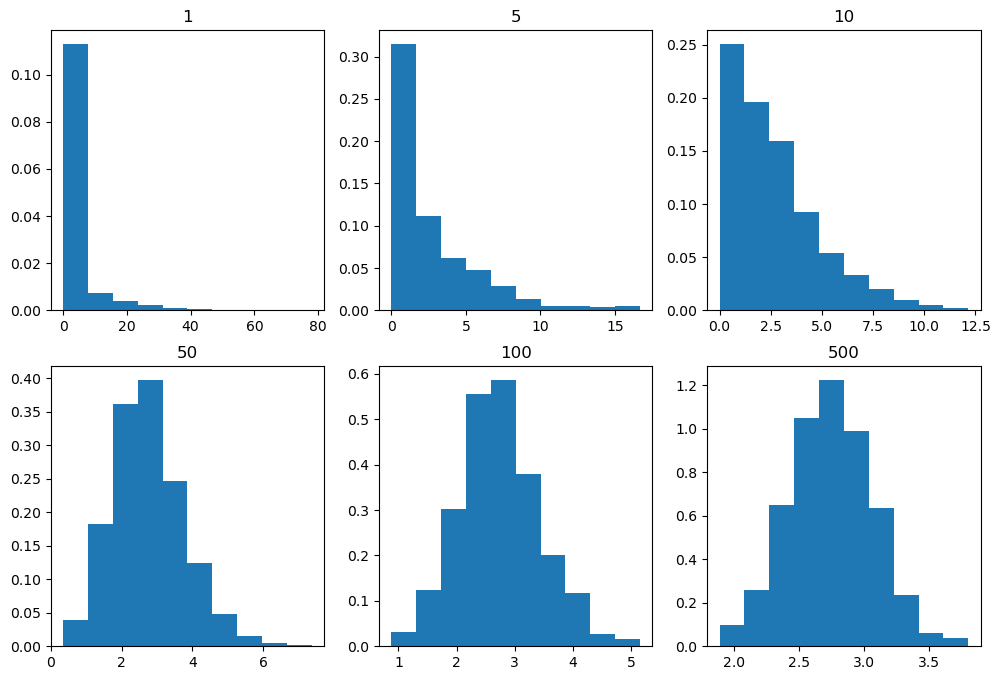

Fail to reject the null hypothesis with a test statistic of 0.01


In [308]:
# sample size
size = [1, 5, 10, 50, 100, 500]

# list of sample means
means = []  

# take 1000 means from random samples of incremented sizes
for s in size:
    # seeded random for consistency
    np.random.seed(4)
    x = [np.mean(np.random.choice(df['prcp'], size=s, replace=True)) for i in range(1000)]
    means.append(x)
 
k = 0 
# plotting all the means
fig, ax = plt.subplots(2, 3, figsize =(12, 8))
for i in range(0, 2):
    for j in range(0, 3):
        # histogram for each sample size
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = size[k])
        k = k + 1
plt.show()

# 95% significance level
z_score = 1.96
population_mean = df['prcp'].mean()
sample_mean = np.mean(means[len(means) - 1])
population_std = np.std(df['prcp'])
num_samples = np.size(means[len(means) - 1])
test_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(num_samples))

# compare to the test statistic to the z-score value
if np.abs(test_statistic) > z_score:
    print('Reject the null hypothesis with a test statistic of', round(test_statistic, 2))
else:
    print('Fail to reject the null hypothesis with a test statistic of', round(test_statistic, 2))